In [7]:
# import packages
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input, Reshape, MaxPooling2D, Conv2D, Dense, Flatten
from tensorflow.python.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# download dataset
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
print("Training\t{}".format(len(data.train.labels)))
print("Test\t\t{}".format(len(data.test.labels)))
print("Validation\t{}".format(len(data.validation.labels)))

Training	55000
Test		10000
Validation	5000


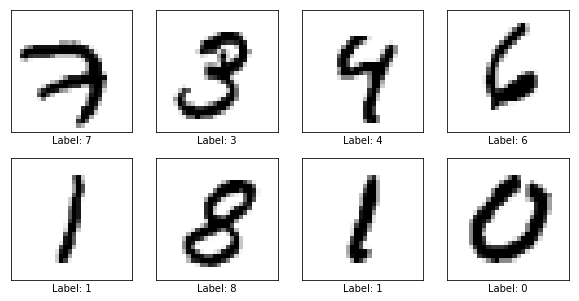

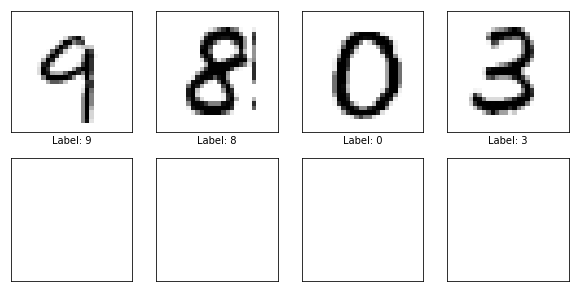

In [37]:
WIDTH = 28
HEIGHT = 28

sz_image = WIDTH * HEIGHT
shape_image = (WIDTH, HEIGHT, 1)

def plotimages(images, label, label_pred=None):
    assert len(images) == len(label)
    for ifig in range(np.int(np.ceil(len(label) / 16))):
        fig, axes = plt.subplots(2, 8)
        fig.set_figheight(5)
        fig.set_figwidth(18)
        for i, ax in enumerate(axes.flat):
            i_data = ifig * 8 + i
            ax.set_xticks([])
            ax.set_yticks([])
            if i_data < len(images):
                ax.imshow(images[i_data].reshape((WIDTH, HEIGHT)), cmap="binary")
                if label_pred is None:
                    ax.set_xlabel("Label: {0}".format(label[i_data]))
                else:
                    ax.set_xlabel("Label: {0}  Pred: {1}".format(label[i_data], label_pred[i_data]))
# test it out
plotimages(data.train.images[:16], np.argmax(data.train.labels[:16], axis=1))

In [14]:
num_classes = data.train.labels.shape[1]
num_batch = 100

model = Sequential()
model.add(InputLayer(input_shape=(sz_image,)))
model.add(Reshape(shape_image))

model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding="same", activation="relu", name="conv1"))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding="same", activation="relu", name="conv2"))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

optimizer = Adam(lr=1e-3)

In [16]:
# compile the model, define the loss function and metrics
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
# fit to the training data
model.fit(x=data.train.images, y=data.train.labels, epochs=1, batch_size=num_batch)

Epoch 1/1
55000/55000 [==============================] - 45s 822us/step - loss: 0.1933 - acc: 0.9431


In [18]:
# evaluate the model for the test set
result = model.evaluate(x=data.test.images,
                        y=data.test.labels)
y_pred = model.predict(x=data.test.images)
# print the accuracy for every result
for name, value in zip(model.metrics_names, result):
    print(name, value)

10000/10000 [==============================] - 3s 303us/step
loss 0.05494033832000569
acc 0.9831


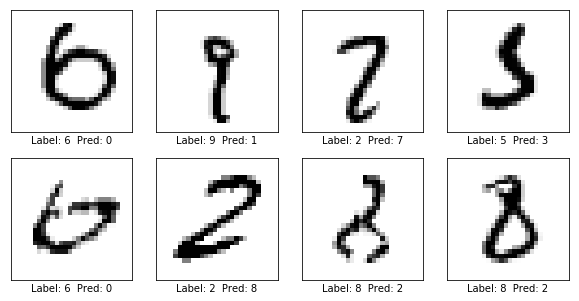

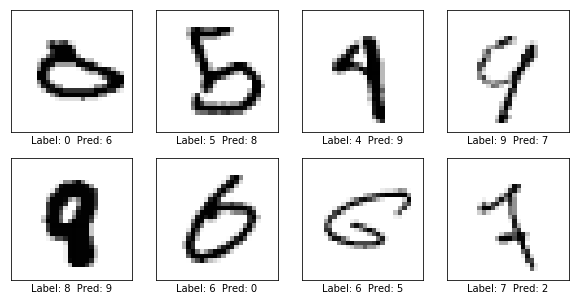

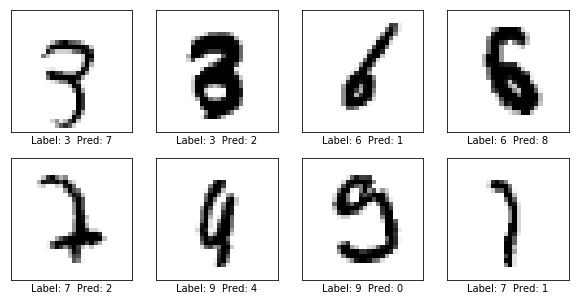

In [39]:
# convert output to index (which is the same as the digit anyway)
label = np.argmax(data.test.labels, axis=1)
label_pred = np.argmax(y_pred, axis=1)
correct = label==label_pred
# show some example images that are incorrect
images_incorrect = data.test.images[correct==False]
label_pred_incorrect = label_pred[correct==False]
label_incorrect = label[correct==False]
plotimages(images_incorrect[:24], label_incorrect[:24], label_pred_incorrect[:24])

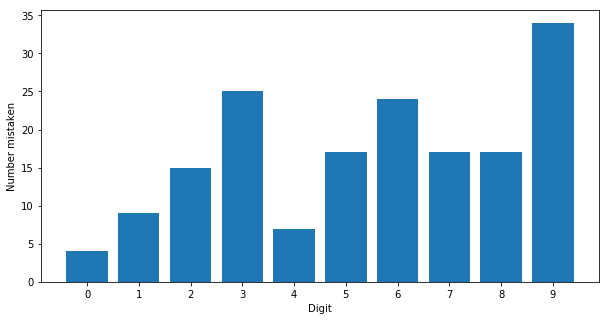

In [44]:
error_summary = {};
for i in range(num_classes):
    error_summary[str(i)] = len(label_incorrect[label_incorrect==i]);
plt.figure(figsize=(10, 5));
plt.bar(error_summary.keys(), error_summary.values());
plt.xlabel("Digit");
plt.ylabel("Number mistaken");

Convolution Weights Layer 1


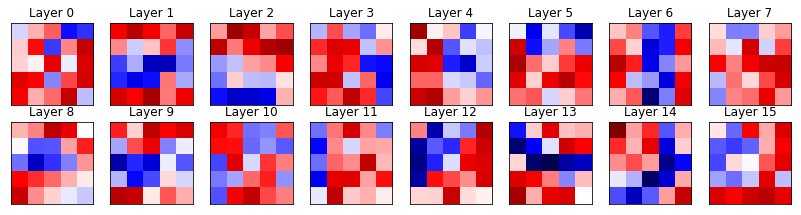

Convolution Weights Layer 2


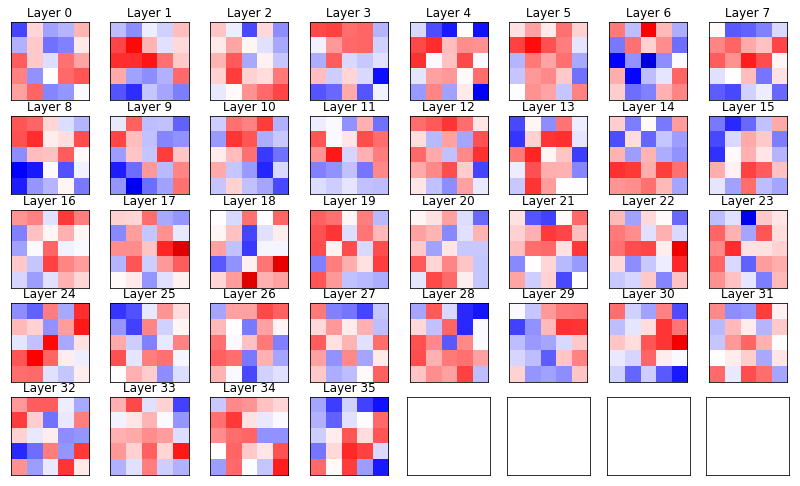

In [61]:
def plotconvweights(weights, input_channel=0):
    w_min = np.min(weights)
    w_max = np.max(weights)
    num_filters = weights.shape[3]
    num_rows = np.int(np.ceil(num_filters / 10))
    
    fig, axes = plt.subplots(num_rows, 10)
    fig.set_figheight(5 * num_rows / 3)
    fig.set_figwidth(18)
    for i_weight, ax in enumerate(axes.flat):
        ax.set_xticks([])
        ax.set_yticks([])
        if i_weight < num_filters:
            img = weights[:, :, input_channel, i_weight]
            ax.imshow(img, vmin=w_min, vmax=w_max, interpolation='nearest', cmap='seismic')
            ax.set_title("Layer {}".format(i_weight))

print("Convolution Weights Layer 1")
plotconvweights(model.get_layer("conv1").get_weights()[0])
plt.show()
print("Convolution Weights Layer 2")
plotconvweights(model.get_layer("conv2").get_weights()[0])